# Lec 8 Qoura Question Pair Problem 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# !pip install datasets

In [4]:
from datasets import load_dataset
df = load_dataset("AlekseyKorshuk/quora-question-pairs")
df.shape

d:\Users\Asadullah Core\Apps\AS\envs\pythoneda\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


{'train': (404290, 6)}

In [5]:
# Convert each split to a separate DataFrame
train_df = df["train"].to_pandas()  # For training set

In [ ]:
# To check rows and column 
train_df.shape

(404290, 6)

In [8]:
train_df.head(10)

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
5,5,11,12,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",1
6,6,13,14,Should I buy tiago?,What keeps childern active and far from phone ...,0
7,7,15,16,How can I be a good geologist?,What should I do to be a great geologist?,1
8,8,17,18,When do you use シ instead of し?,"When do you use ""&"" instead of ""and""?",0
9,9,19,20,Motorola (company): Can I hack my Charter Moto...,How do I hack Motorola DCX3400 for free internet?,0


In [ ]:
# To check the data types of each column
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [10]:
# Check for missing values
train_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [11]:
# Check for duplicate rows
train_df.duplicated().sum()

np.int64(0)

## Distribution of duplicate Questions

In [ ]:
# How much Duplicate Questions(rows)
train_df.is_duplicate.value_counts()

is_duplicate
0    255027
1    149263
Name: count, dtype: int64

In [27]:
# Percentage of duplicate questions
train_df.is_duplicate.value_counts()/train_df.is_duplicate.count()*100

is_duplicate
0    63.080215
1    36.919785
Name: count, dtype: float64

In [31]:
train_df.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate'], dtype='object')

C:\Users\HP\AppData\Local\Temp\ipykernel_9524\1258565191.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(train_df["is_duplicate"].value_counts(),palette="bright")


<Axes: xlabel='is_duplicate', ylabel='count'>

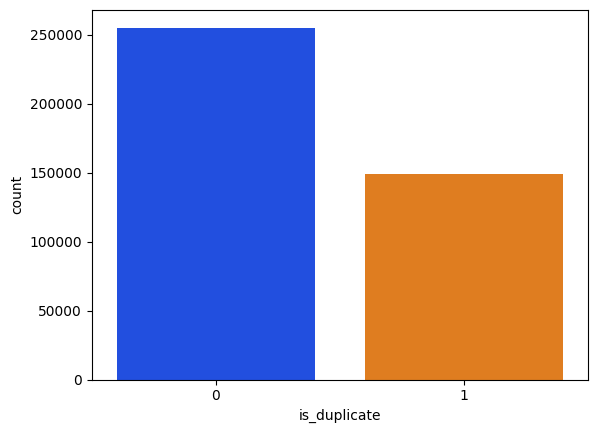

In [44]:
# Make bar plot to visualize duplicate questions
sns.barplot(train_df["is_duplicate"].value_counts(),palette="bright")

# Unique and Repeated Questions (Rows)


In [ ]:
# Creating a Pandas Series
qid = pd.Series(train_df["qid1"].to_list()+train_df["qid2"].to_list())
print(f"Total Unique Questions : {np.unique(qid).shape[0]}")

Total Unique Questions : 537933


#### How many questions appear more than once in our data?

In [55]:
x = qid.value_counts()>1
print(f"Total Repeated Questions : {x[x].shape[0]}")

Total Repeated Questions : 111780


# Repeated Quesions Histogram